# Régressions linéaire et logistique

Coder une fonction `linear_regression(theta, x)` qui retoure $y = \sum_{i=0}^n \theta_i x_i$. On prendra $x_0 = 1$

In [1]:
import numpy as np
import unittest
from unittest_data_provider import data_provider

In [2]:
def add_x_column(x): #x is np.array
    return np.column_stack((np.ones(len(x)),x))

def linear_regression(theta, x): #theta and x are np arrays
    if len(theta) != x.shape[1]:
        raise Classe_d_exception_taille_vecteur_differente    
    return np.matmul(x, theta)

In [3]:
vect_ex = np.array([[2,3,4], [5,6,7]])
theta_ex = np.array([1,1,1,1])

#exceptions à add :
print(vect_ex, 'theta =', theta_ex)
print(add_x_column(vect_ex).shape[1])
print(len(theta_ex))

add_x_column(vect_ex).shape[1] == len(theta_ex)

[[2 3 4]
 [5 6 7]] theta = [1 1 1 1]
4
4


True

Coder la fonction `linear_regression_cost(theta, X, Y)` qui prend argument un modèle, un ensemble d'exemple et de labels et qui calcule son erreur. 

In [4]:
def linear_regression_cost(theta, X, Y): #Y is the result of linear_regression and is a np.array
    h = (linear_regression(theta, X))
    J = 1/(2 * len(X)) * np.sum((h - Y)**2)
    return J

In [5]:
a = np.array([1, 2, 3])
b = np.array([[1, 2, 3]])
a.shape, b.shape
a.T.shape

(3,)

On note $J(\theta)$ la fonction de coût de du modèle (qui mesure sa performance sur l'ensemble de train). Calculer $\frac{\partial J}{\partial \theta_i} $. Coder la fonction `get_cost_derivative(model, X, Y)` qui retourne les dérivée partielles de la fonction de coût

In [6]:
def get_cost_derivative(theta, X, Y):
    h = (linear_regression(theta, X))
    dJ = 1/len(X) * np.matmul((h - Y), X)
    return dJ

X = np.array([[1,2,3], [1,4,5]])
theta = np.array([2,4,2])
y = np.array([18, 31])

#resultats attendus [ -2.5  -8.  -10.5]

dJ = get_cost_derivative(theta, X, y)
print(dJ.shape, dJ)

(3,) [ -2.5  -8.  -10.5]


In [7]:
a = np.array([[1, 2], [4, 2]])
print(a)
sum(a), np.sum(a), np.sum(a, axis=0), np.sum(a, axis=1)

[[1 2]
 [4 2]]


(array([5, 4]), 9, array([5, 4]), array([3, 6]))

Coder une fonction `gradient_descent(initial_theta, X, Y, max_iteration)` qui effectue la descente de gradient pour la régression linéaire. 

In [8]:
def gradient_descent(theta, alpha, X, Y, max_iteration):
  
    for i in range(max_iteration):
        # use previous functions!
        theta = theta - alpha * get_cost_derivative(theta, X, Y)
        print('theta =', theta, 'coût=', linear_regression_cost(theta, X, Y))
        
    return theta, linear_regression_cost(theta, X, Y)

alpha = 0.01
theta = np.array([1,2,3])
X = np.array([[1,2,3],[1,1,1]])
y = np.array([4,2])
max_iteration = 50

#Jeu de data : 3 paramètres theta et 4 samples
theta_test = np.array([1,1,1])
X_test = np.array([[1,2,2],[1,4,4],[1,8,8],[1,16,16]])
y_test = np.array([9,17,33,65])

gradient_descent(theta_test, alpha, X_test, y_test, max_iteration)

theta = [1.15 2.7  2.7 ] coût= 84.88625000000008
theta = [1.0435  1.49875 1.49875] coût= 42.38664612500007
theta = [1.1182525 2.3476125 2.3476125] coût= 21.1654390607844
theta = [1.0649281  1.74780231 1.74780231] coût= 10.569111587637387
theta = [1.10210847 2.17166877 2.17166877] coût= 5.278074152768519
theta = [1.07533707 1.87217372 1.87217372] coût= 2.636111683955463
theta = [1.09375764 2.08382811 2.08382811] coût= 1.3169040881919933
theta = [1.08024585 1.9342885  1.9342885 ] coût= 0.6581838376103635
theta = [1.08930012 2.03997961 2.03997961] coût= 0.3292628268983189
theta = [1.08241017 1.96531676 1.96531676] coût= 0.16501953272000416
theta = [1.08678856 2.0180975  2.0180975 ] coût= 0.0830043082278488
theta = [1.08320605 1.98082261 1.98082261] coût= 0.04204781254308823
theta = [1.08525059 2.00718372 2.00718372] coût= 0.021593079070896606
theta = [1.08332053 1.9885776  1.9885776 ] coût= 0.011375457701860808
theta = [1.08420068 2.00174664 2.00174664] coût= 0.006269530575595177
theta = 

(array([1.07439177, 1.99671146, 1.99671146]), 0.0009359271627539924)

In [9]:
linear_regression(np.array([1.07439177, 1.99671146, 1.99671146]), X_test)

array([ 9.06123761, 17.04808345, 33.02177513, 64.96915849])

In [10]:
#tester get_cost_derivative(theta, add_x_column(X), Y)
#et tester gradient_descent

Génerer un jeux de donnée simple et tester votre approche. Vous pourrez afficher le sur un graphique les données initiale et les prédictions de votre modèle après l'inférence

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
df = pd.read_csv("ex1data1.txt", header = None)
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [13]:
X = add_x_column(df[0])
#print(np.dtype(X))
Y = df[1]
alpha = 0.024
theta = np.array([1,0.8])
max_iteration = 600

Z = gradient_descent(theta, alpha, X, Y, max_iteration)
print(Z)

theta = [0.95947108 0.60910149] coût= 7.007976626312817
theta = [0.9572995  0.79909736] coût= 6.969591852158136
theta = [0.91797217 0.61832459] coût= 6.932407342435395
theta = [0.91499035 0.79842829] coût= 6.896367072326629
theta = [0.87680946 0.6272483 ] coût= 6.8614179004390525
theta = [0.87306798 0.7979789 ] coût= 6.827509417795447
theta = [0.83598123 0.63588676] coût= 6.794593804756147
theta = [0.83152791 0.79773605] coût= 6.7626256954558706
theta = [0.79548569 0.64425337] coût= 6.731562049360443
theta = [0.79036578 0.79768732] coût= 6.701362029569319
theta = [0.75532099 0.65236084] coût= 6.671986887509401
theta = [0.74957731 0.79782092] coût= 6.643399853684291
theta = [0.71548528 0.66022124] coût= 6.615566034160815
theta = [0.70915831 0.79812574] coût= 6.588452312491315
theta = [0.67597664 0.667846  ] coût= 6.562027256786062
theta = [0.66910469 0.79859123] coût= 6.536261031665193
theta = [0.63679314 0.67524598] coût= 6.511125314833764
theta = [0.62941242 0.79920742] coût= 6.486593

theta = [-2.14718259  1.01720337] coût= 4.755339441792189
theta = [-2.15471519  1.01828494] coût= 4.752936034824372
theta = [-2.16227882  1.0187286 ] coût= 4.75055338080197
theta = [-2.1697478   1.01978671] coût= 4.748191300415588
theta = [-2.17724475  1.02024028] coût= 4.745849615910965
theta = [-2.18465059  1.02127588] coût= 4.743528151075194
theta = [-2.1920815   1.02173856] coût= 4.741226731223054
theta = [-2.19942468  1.02275254] coût= 4.738945183183492
theta = [-2.2067902   1.02322357] coût= 4.736683335286234
theta = [-2.21407118  1.02421677] coût= 4.734441017348528
theta = [-2.22137193  1.02469543] coût= 4.73221806066203
theta = [-2.2285912   1.02566868] coût= 4.730014297979789
theta = [-2.2358278   1.02615428] coût= 4.727829563503395
theta = [-2.24298582  1.02710835] coût= 4.725663692870219
theta = [-2.25015889  1.02760026] coût= 4.723516523140796
theta = [-2.25725614  1.02853587] coût= 4.721387892786322
theta = [-2.26436627  1.02903347] coût= 4.719277641676269
theta = [-2.2714

theta = [-3.11171702  1.11426704] coût= 4.532938398691755
theta = [-3.11510928  1.11460563] coût= 4.532455193761056
theta = [-3.11848643  1.11494704] coût= 4.531976160697988
theta = [-3.1218494  1.1152828] coût= 4.531501263483712
theta = [-3.1251974   1.11562118] coût= 4.53103046641036
theta = [-3.12853132  1.11595413] coût= 4.530563734078362
theta = [-3.13185042  1.11628949] coût= 4.53010103139378
theta = [-3.13515555  1.11661966] coût= 4.529642323565664
theta = [-3.13844601  1.11695204] coût= 4.5291875761034435
theta = [-3.14172259  1.11727943] coût= 4.528736754814328
theta = [-3.14498465  1.11760887] coût= 4.528289825800743
theta = [-3.14823293  1.11793351] coût= 4.527846755457777
theta = [-3.15146683  1.11826003] coût= 4.52740751047065
theta = [-3.15468707  1.11858195] coût= 4.526972057812216
theta = [-3.15789305  1.11890557] coût= 4.526540364740482
theta = [-3.16108548  1.11922478] coût= 4.526112398796132
theta = [-3.16426379  1.11954554] coût= 4.5256881278001035
theta = [-3.16742

theta = [-3.47399519  1.15066067] coût= 4.49316757674264
theta = [-3.47581992  1.15084403] coût= 4.49302774289668
theta = [-3.47763678  1.15102651] coût= 4.492889116340303
theta = [-3.47944576  1.15120829] coût= 4.49275168665008
theta = [-3.48124692  1.15138919] coût= 4.492615443492578
theta = [-3.48304029  1.1515694 ] coût= 4.492480376623574
theta = [-3.4848259   1.15174874] coût= 4.492346475887294
theta = [-3.48660379  1.15192739] coût= 4.492213731215653
theta = [-3.48837398  1.15210518] coût= 4.49208213262748
theta = [-3.49013652  1.15228229] coût= 4.491951670227785
theta = [-3.49189143  1.15245855] coût= 4.491822334207009
theta = [-3.49363875  1.15263412] coût= 4.491694114840284
theta = [-3.49537851  1.15280887] coût= 4.491567002486706
theta = [-3.49711074  1.15298292] coût= 4.491440987588607
theta = [-3.49883548  1.15315616] coût= 4.4913160606708376
theta = [-3.50055275  1.15332871] coût= 4.491192212340056
theta = [-3.5022626   1.15350045] coût= 4.491069433284014
theta = [-3.50396

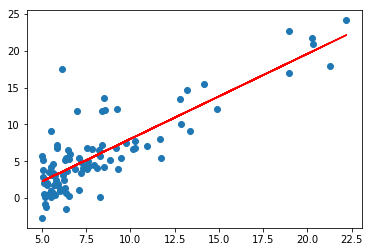

In [14]:
plt.scatter(df[0],df[1])
theta_test = np.array([-3.53338006, 1.15662656])
hyp = theta_test[1] * df[0] + theta_test[0]
plt.plot(df[0], hyp, 'r')
plt.show()

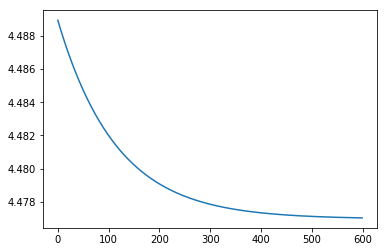

(array([-3.8689009 ,  1.19033326]), 4.4770371549798895)

In [15]:
def gradient_descent_plotting(theta, alpha, X, Y, max_iteration):
    x = []
    y = []
    for i in range(max_iteration):
        # use previous functions!
        x.append(i)
        y.append(linear_regression_cost(theta, X, Y))
        theta = theta - alpha * get_cost_derivative(theta, X, Y)
    plt.plot(y)    
    plt.show()
    return theta, linear_regression_cost(theta, X, Y)

gradient_descent_plotting(theta_test, alpha, X, df[1],600)

## Mettre des titres aux graphes :

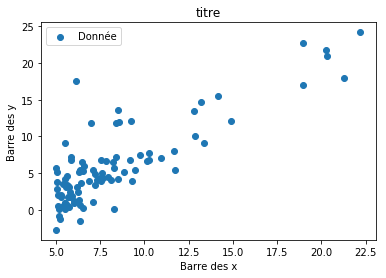

In [16]:
%matplotlib inline

fig = plt.figure()
ax = plt.subplot(111, title = 'Title') #numero de ligne,
# numero de colonne (<- pour la matrice de la figure), numero de position de la figure
ax.scatter(df[0], df[1], label = 'Donnée')
ax.set_xlabel('Barre des x')
ax.set_ylabel('Barre des y')

#plt.plot()
plt.legend()
plt.show()

## Régression logistique

Coder la fonction `sigmoid`

In [17]:
thetab = np.array([5,4])
Xb = np.array([[1,5],[1,3],[1,2],[1,4]])
Yb = np.array([0,1,1,0])

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid(linear_regression(thetab, Xb))

array([1.        , 0.99999996, 0.99999774, 1.        ])

Coder la fonction `logistic_regression_cost(model, X, Y)`. On (ra)pelle que la fonction de coût pour la régression logistique est différente de la fonction de coût de la régression linéaire.

In [19]:
def logistic_regression_cost(theta, X, y):
    h = sigmoid(linear_regression(theta, X))
    J = - y * np.log(h) - (1 - y) * np.log(1 - h)
    return sum(J)

logistic_regression_cost(thetab, Xb, Yb)

45.99999801800189

Coder la fonction `gradient_descent(initial_model, X, Y)` qui effectue la descente de gradient pour la régression logistique

In [20]:
def get_cost_derivative_RLT(theta, X, Y):
    h = sigmoid(linear_regression(theta, X))
    dJ = 1 / len(X) * np.matmul((h - Y), X)
    return dJ

def gradient_descent_RLT(theta, alpha, X, Y, max_iteration):
  
    for i in range(max_iteration):
        # use previous functions!
        theta = theta - alpha * get_cost_derivative_RLT(theta, X, Y)
        print('theta =', theta, 'coût=', logistic_regression_cost(theta, X, Y))
        
get_cost_derivative_RLT(theta, Xb, Yb)
alphab = 0.9
max_iteration = 90
gradient_descent_RLT(thetab, alphab, Xb, Yb, max_iteration)

theta = [4.55000052 1.97500105] coût= 26.875246589872933
theta = [ 4.10005365 -0.04988422] coût= 7.829431056394329
theta = [ 3.66749529 -2.0127727 ] coût= 3.362300161334095
theta = [ 4.00255451 -1.14354555] coût= 1.2260332737199882
theta = [ 4.00253102 -1.3277348 ] coût= 1.223045887335996
theta = [ 4.0974626  -1.16732028] coût= 1.206824962105522
theta = [ 4.09556609 -1.35438214] coût= 1.203005926248946
theta = [ 4.18937735 -1.19426348] coût= 1.1854473544499933
theta = [ 4.18788196 -1.37583434] coût= 1.1800832851825356
theta = [ 4.27832693 -1.2239039 ] coût= 1.1624862251379595
theta = [ 4.27915931 -1.39294572] coût= 1.155439715194609
theta = [ 4.36446421 -1.25549383] coût= 1.1389566773022919
theta = [ 4.36903801 -1.40693399] coût= 1.1305882005207708
theta = [ 4.44803986 -1.28818912] coût= 1.115895046434078
theta = [ 4.45721231 -1.41907549] coût= 1.1068176822406703
theta = [ 4.52936643 -1.32116011] coût= 1.0940909007330426
theta = [ 4.5434709  -1.43051284] coût= 1.0849118517789043
theta 

Plotter la courbe obtenue

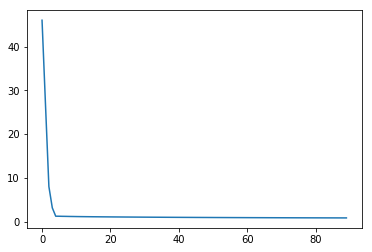

0.8351552981768866

In [21]:
def gradient_descent_RLT_plotting(theta, alpha, X, Y, max_iteration):
    x = []
    y = []
    for i in range(max_iteration):
        # use previous functions!
        x.append(i)
        y.append(logistic_regression_cost(theta, X, Y))
        theta = theta - alpha * get_cost_derivative_RLT(theta, X, Y)
        alpha = 0.99 * alpha
    plt.plot(y)    
    plt.show()
    return logistic_regression_cost(theta, X, Y)

gradient_descent_RLT_plotting(thetab, alphab, Xb, Yb, max_iteration)

### Sur les données d'Andrew Ng

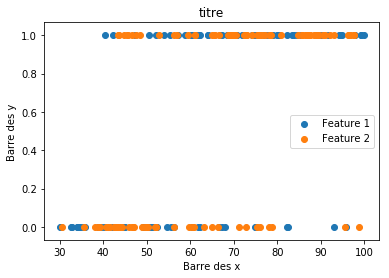

In [22]:
df2 = pd.read_csv("ex2data1.txt", header = None)
df2.head()

X2 = add_x_column(df2[0])
#print(np.dtype(X))
Y2 = df2[2]

fig = plt.figure()
ax = plt.subplot(111, title = 'titre') #numero de ligne,
# numero de colonne (<- pour la matrice de la figure), numero de position de la figure
ax.scatter(df2[0], df2[2], label = 'Feature 1')
ax.scatter(df2[1], df2[2], label = 'Feature 2') 
ax.set_xlabel('Barre des x')
ax.set_ylabel('Barre des y')

#plt.plot()
plt.legend()
plt.show()

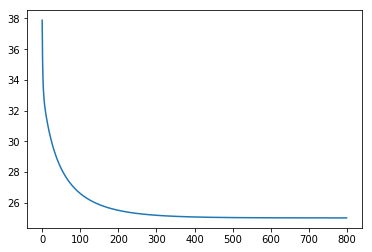

25.0046415707647

In [23]:
X2 = add_x_column(df2)
X2 = X2[:,0:3]
#print(X2)

#print(np.mean(X2[1]))
#print(np.min(X2[1]))
#print(np.max(X2[1]))

X2_scaled = (X2 - np.mean(X2)) / (np.max(X2) - np.min(X2))
#print(X2_scaled)

Y2 = df2[2]
alpha2 = 6
theta2 = np.array([5,5,5])
max_iteration2 = 800

gradient_descent_RLT_plotting(theta2, alpha2, X2_scaled, Y2, max_iteration2)

Comparer avec la régression linéaire de SciPy

## Tests unitaires

In [24]:
class CourseraTest(unittest.TestCase):
    x_array = lambda: (
        (np.array([[0,1,1,1]]), np.array([[1,0,1,1,1]])),
        (np.array([[0,2,2,2],[0,2,2,2],[0,3,3,3]]), np.array([[1,0,2,2,2],[1,0,2,2,2],[1,0,3,3,3]])),
    )
        
    lin_r_data = lambda: (
        (np.array([3,1,2,1,1]), np.array([[0,1,1,1]]), 7.0),
        (np.array([1,2]), np.array([[1],[1]]) , np.array([3,3])),
    )
 
    lin_r_cost = lambda: (
         (np.array([1,1,1,1]), np.array([[2,1,1]]), np.array([[5]]), 0.0),
         (np.array([1,1,1]), np.array([[1,2],[1,1]]), np.array([3,4]), 0.5),
    )

    @data_provider(x_array)
    def test_add_x_column(self, x, expected_result):
        np.testing.assert_array_equal(add_x_column(x), expected_result)
  
    @data_provider(lin_r_data)
    def test_linear_regression(self, theta, x, expected_result):
        np.testing.assert_array_equal(linear_regression(theta, add_x_column(x)), expected_result)
    
    @data_provider(lin_r_cost)
    def test_linear_regression_cost(self, theta, x, Y, expected_result):
        X = add_x_column(x)
        cost = linear_regression_cost(theta, X, Y)
        self.assertEqual(cost, expected_result)

#    def test_equality(self, x, expected_result):
#       self.assertEqual(1,2)

unittest.main(argv=[''], verbosity=2, exit=False)

test_add_x_column (__main__.CourseraTest) ... ok
test_linear_regression (__main__.CourseraTest) ... ok
test_linear_regression_cost (__main__.CourseraTest) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.000s

OK


## Améliorations à apporter :

In [1]:
# continuer les tests unitaires à partir de get_cost_derivative(theta, add_x_column(X), Y),
# gradient_descent etc.

# rajouter des exceptions

# rajouter des titres aux plots